In [1]:
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
pi = np.pi
sin = np.sin
cos = np.cos
log = np.log

def GLCG(x0):
    a,b,m = 625,6571,31104
    while True:
        x0 = (a*x0+b)%m
        yield x0/m

glcg = GLCG(69)

def U(a,b):
    return a+(b-a)*next(glcg)


def box_muller(mu=0,sigma=1): #boxmuller
    epsilon = 1e-6 # prevent divison by zero
    U1, U2 = U(0,1), U(0,1)
    R = (-2*log(U1+epsilon))**0.5
    theta = 2*pi*U2
    return mu+sigma*R*cos(theta)

## Task 2

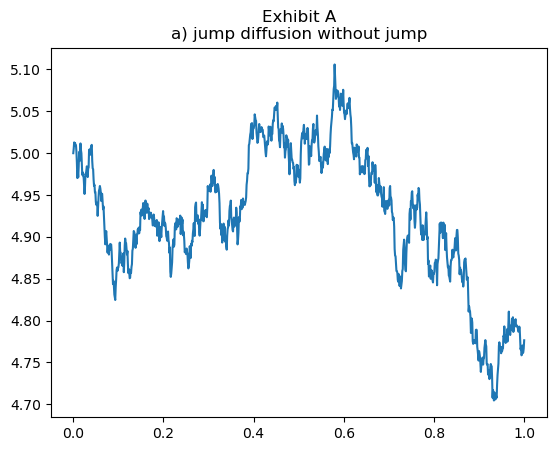

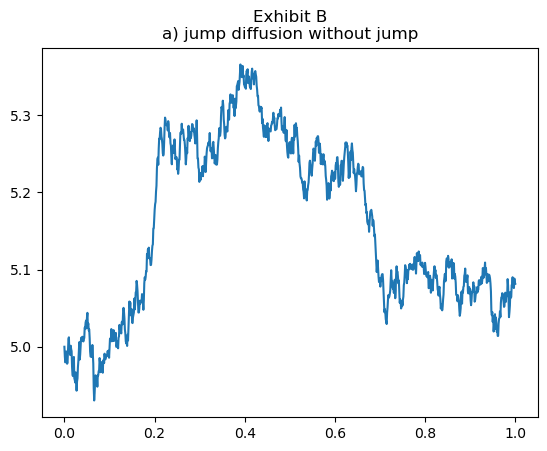

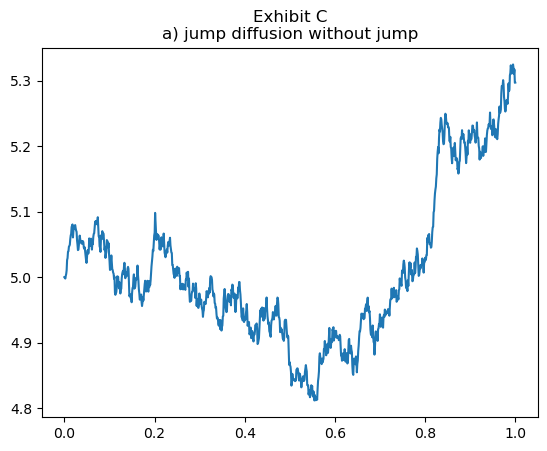

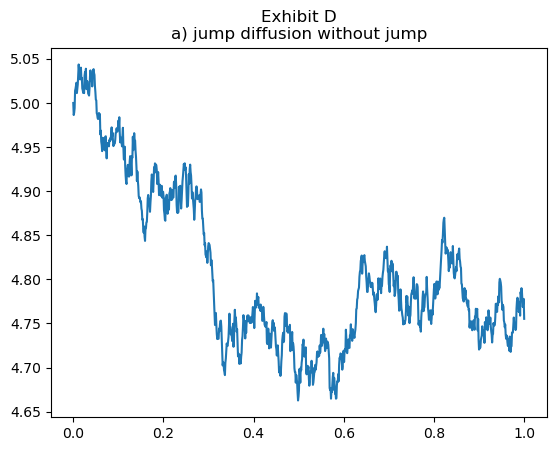

In [35]:
mu = 0.06
s = 0.3
for exhibit in ("A","B","C","D"):
    T = np.linspace(0,1,1000)
    W = [0] #wiener
    X = [5]
    for t1,t2 in zip(T,T[1:]):
        Z = box_muller()
        W += [W[-1] + (t2-t1)**0.5 * Z]
        x = X[-1] + (mu-0.5*s*s)*(t2-t1) + s*(W[-1]-W[-2]) 
        X += [x]

    plt.plot(T,X)
    plt.title(f"Exhibit {exhibit}\na) jump diffusion without jump")
    plt.show()

In [3]:
def poisson(theta): #mean theta
    p = F = np.exp(-theta)
    N = 0
    while U(0,1)>F:
        N += 1
        p *= theta/N
        F += p
    return N

#### Also adding $\lambda=10$, because I can.

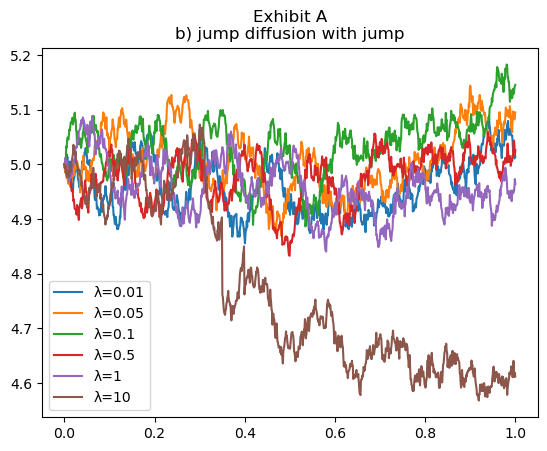

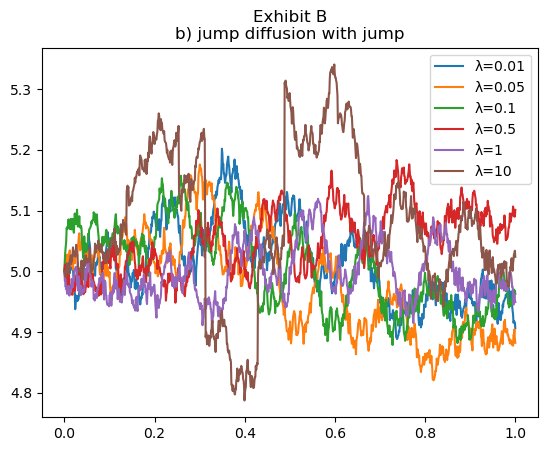

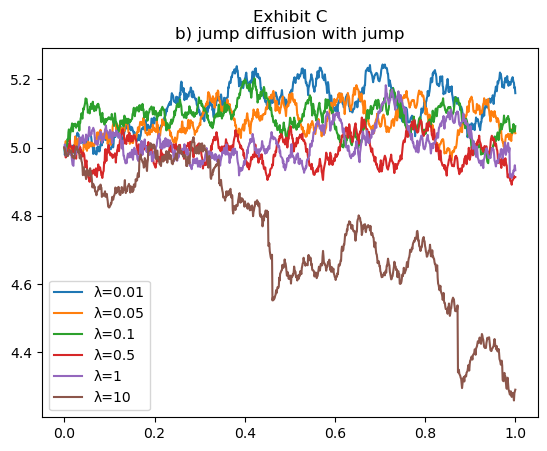

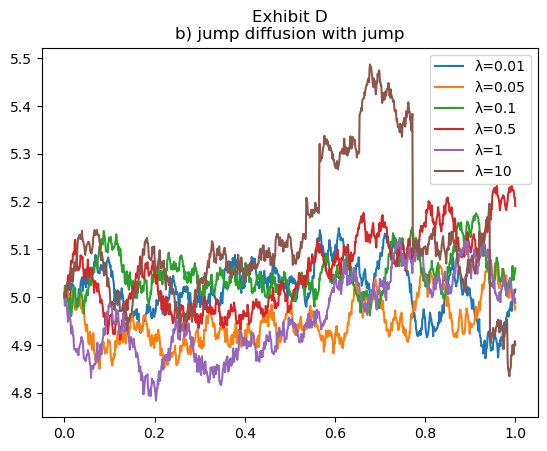

In [36]:
mu = 0.06
s = 0.3
for exhibit in ("A","B","C","D"):
    for λ in (0.01, 0.05, 0.1, 0.5, 1, 10):
        T = np.linspace(0,1,1000)
        W = [0] #wiener
        X = [5]
        for t1,t2 in zip(T,T[1:]):
            Z = box_muller()
            W += [W[-1] + (t2-t1)**0.5 * Z]
            M = sum(np.log(0.1*box_muller()+1) for i in range(poisson(λ*(t2-t1))))
            x = X[-1] + (mu-0.5*s*s)*(t2-t1) + s*(W[-1]-W[-2]) + M
            X += [x]

        plt.plot(T,X, label=f"λ={λ}")
        #plt.ylim(4,6)
        plt.title(f"Exhibit {exhibit}\nb) jump diffusion with jump")
        plt.legend()
    plt.show()

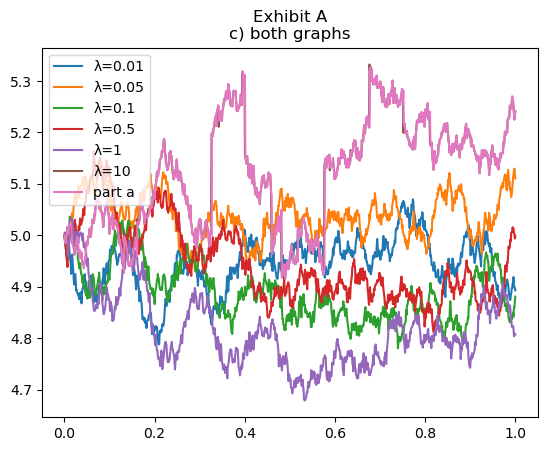

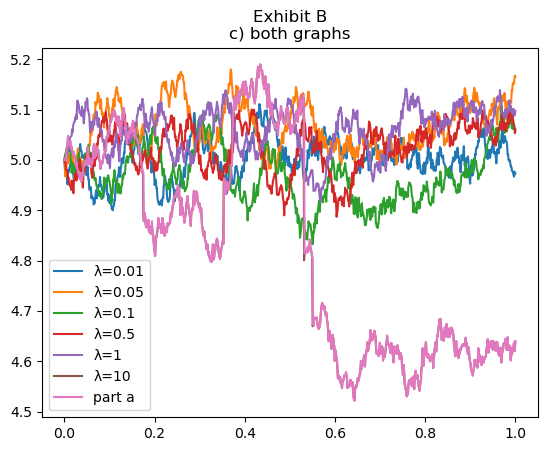

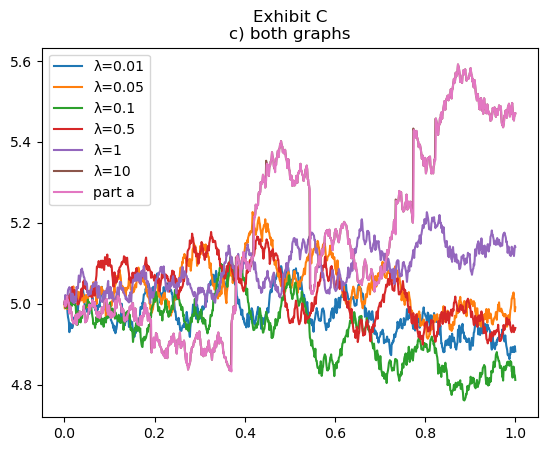

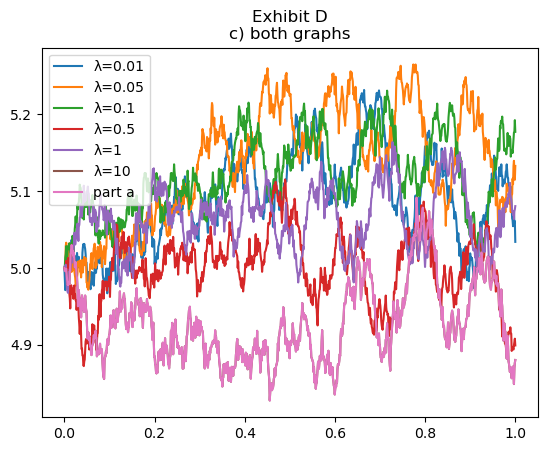

In [37]:
mu = 0.06
s = 0.3
for exhibit in ("A","B","C","D"):
    for λ in (0.01, 0.05, 0.1, 0.5, 1, 10):
        T = np.linspace(0,1,1000)
        W = [0] #wiener
        X = [5]
        Xa = [5]
        for t1,t2 in zip(T,T[1:]):
            Z = box_muller()
            W += [W[-1] + (t2-t1)**0.5 * Z]
            M = sum(np.log(0.1*box_muller()+1) for i in range(poisson(λ*(t2-t1))))
            x = X[-1] + (mu-0.5*s*s)*(t2-t1) + s*(W[-1]-W[-2]) + M
            X += [x]
            Xa += [x-M]

        plt.plot(T,X, label=f"λ={λ}")
        plt.title(f"Exhibit {exhibit}\nc) both graphs")

    plt.plot(T,Xa,label="part a")
    plt.legend()

    plt.show()

In [85]:
df1 = yf.download("AAPL", start="2019-01-01", end="2019-12-31")
df = df1["Adj Close"]["AAPL"].values

[*********************100%***********************]  1 of 1 completed


## Task 1

In [ ]:
df = df[1:]/df[:-1] - 1 # evil numpy hack

In [66]:
mu = 252*df.mean()
s = (252*df.var())**0.5
N = len(df)
N

250

In [68]:
print(f"mu={mu}\nsigma={s}")

mu=0.6683345601037248
sigma=0.2618598454251539


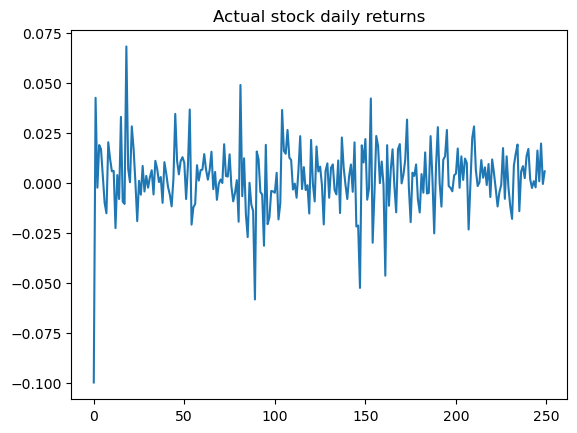

In [69]:
plt.plot(df)
plt.title("Actual stock daily returns")
plt.show()

In [101]:
S = df1.iloc[:,0].values

Actual 70.73361206054688
Predicted 68.92983032595455


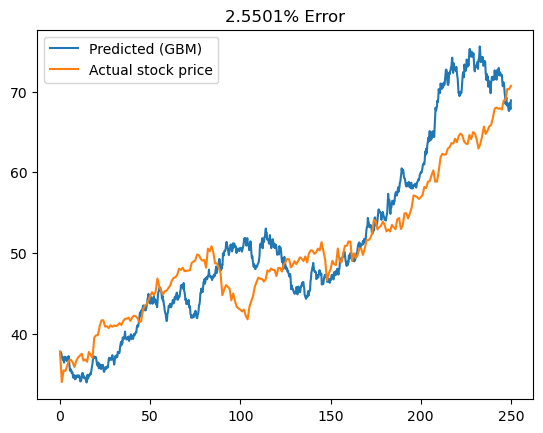

In [113]:
T = np.linspace(0,1,1000)
X = [S[0]]
for t1,t2 in zip(T,T[1:]):
    Z = box_muller()
    x = X[-1] * np.exp((mu-0.5*s*s)*(t2-t1)+s*(t2-t1)**0.5*Z)
    X += [x]

print(f"Actual {S[-1]}")
print(f"Predicted {X[-1]}")

plt.plot(np.linspace(0,250,1000),X,label="Predicted (GBM)")
plt.plot(S, label="Actual stock price")
plt.title(f"{100*(S[-1] - X[-1])/S[-1]:.4f}% Error")
plt.legend()
plt.show()

In [ ]:
# there was a print here but now that there isn't idk what this number means

2.9780249427990384